## Dataset Info

使用 Kaggle 上公開下載的 [Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)。

In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv("data/WineQT.csv")
data.drop(["Id"], axis=1, inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
X = data.drop("quality", axis=1)
y = data["quality"]

X_scaled = StandardScaler().fit_transform(X)

pca = PCA().fit(X_scaled)
pca_res = pca.transform(X_scaled)

pca_res_df = pd.DataFrame(pca_res, columns=[f"PC{i}" for i in range(1, pca_res.shape[1] + 1)])
pca_res_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,0.122336,0.330086,-0.011548,-0.249611,0.046465
1,-0.760892,1.915058,-0.864158,0.536890,0.090935,-0.860406,0.998623,-0.746939,0.547644,0.005196,-0.134810
2,-0.708085,0.914423,-1.142363,0.435075,0.024940,-0.356702,0.536162,-0.575652,0.084118,-0.203715,-0.122553
3,2.308166,-0.224448,0.256895,-0.830630,-1.639209,0.154720,-0.300410,0.494589,-0.110087,-0.121798,0.313678
4,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,0.122336,0.330086,-0.011548,-0.249611,0.046465


## Matplotlib Visualization Tweaks

In [52]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

font_dir = ["Roboto_Condensed"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 14
plt.rcParams["figure.titlesize"] = "xx-large"
plt.rcParams["xtick.labelsize"] = "medium"
plt.rcParams["ytick.labelsize"] = "medium"
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["font.family"] = "Roboto Condensed"

## PCA Plot #1: Explained Variance Plot

**Question**: How much of the total variance in the data is captured by each principal component?

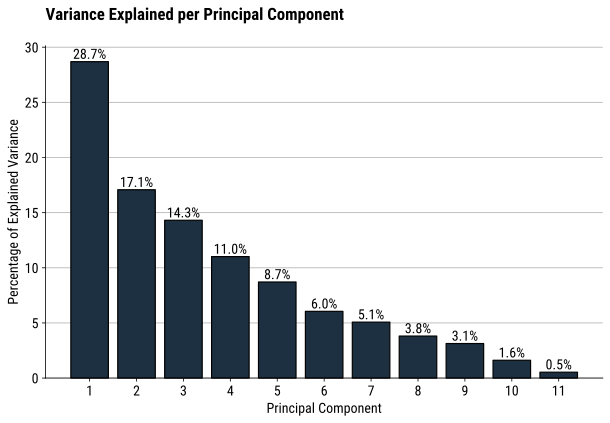

In [53]:
plot_y = [val * 100 for val in pca.explained_variance_ratio_]
plot_x = range(1, len(plot_y) + 1)

bars = plt.bar(plot_x, plot_y, align="center", color="#1C3041", edgecolor="#000000", linewidth=1.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f"{yval:.1f}%", ha="center", va="bottom")

plt.xlabel("Principal Component")
plt.ylabel("Percentage of Explained Variance")
plt.title("Variance Explained per Principal Component", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.grid(axis="y")
plt.xticks(plot_x)

plt.show()

## PCA Plot #2: Cumulative Explained Variance Plot

**Question**: I want to reduce the dimensionality of my data, but still want to keep at least 90% of the variance. What should I do?

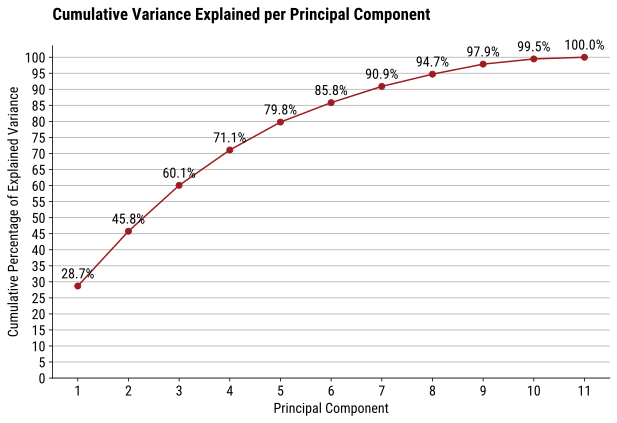

In [54]:
exp_var = [val * 100 for val in pca.explained_variance_ratio_]
plot_y = [sum(exp_var[:i+1]) for i in range(len(exp_var))]
plot_x = range(1, len(plot_y) + 1)

plt.plot(plot_x, plot_y, marker="o", color="#9B1D20")
for x, y in zip(plot_x, plot_y):
    plt.text(x, y + 1.5, f"{y:.1f}%", ha="center", va="bottom")

plt.xlabel("Principal Component")
plt.ylabel("Cumulative Percentage of Explained Variance")
plt.title("Cumulative Variance Explained per Principal Component", loc="left", fontdict={"weight": "bold"}, y=1.06)

plt.yticks(range(0, 101, 5))
plt.grid(axis="y")
plt.xticks(plot_x)

plt.show()

## PCA Plot #3: 2D/3D Component Scatter Plot

**Question**: How can I visualize the relationship between records of a high-dimensional dataset? We can’t see more than 3 dimensions at a time.

### 2D Scatter Plot

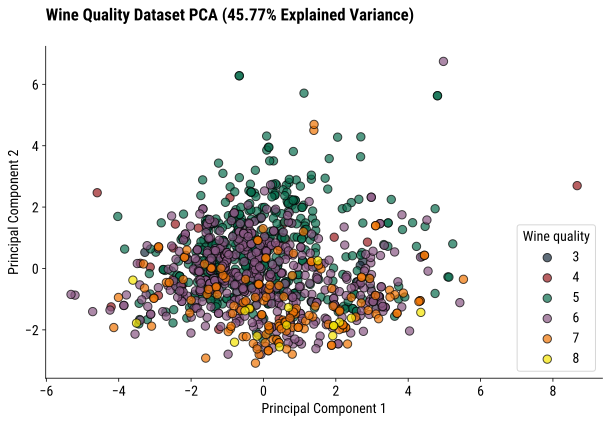

In [55]:
total_explained_variance = sum(pca.explained_variance_ratio_[:2]) * 100
colors = ["#1C3041", "#9B1D20", "#0B6E4F", "#895884", "#F07605", "#F5E400"]

pca_2d_df = pd.DataFrame(pca_res[:, :2], columns=["PC1", "PC2"])
pca_2d_df["y"] = data["quality"]

fig, ax = plt.subplots()
for i, target in enumerate(sorted(pca_2d_df["y"].unique())):
    subset = pca_2d_df[pca_2d_df["y"] == target]
    ax.scatter(x=subset["PC1"], y=subset["PC2"], s=70, alpha=0.7, c=colors[i], edgecolors="#000000", label=target)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Wine Quality Dataset PCA ({total_explained_variance:.2f}% Explained Variance)", loc="left", fontdict={"weight": "bold"}, y=1.06)

ax.legend(title="Wine quality")
plt.show()

### 3D Scatter Plot

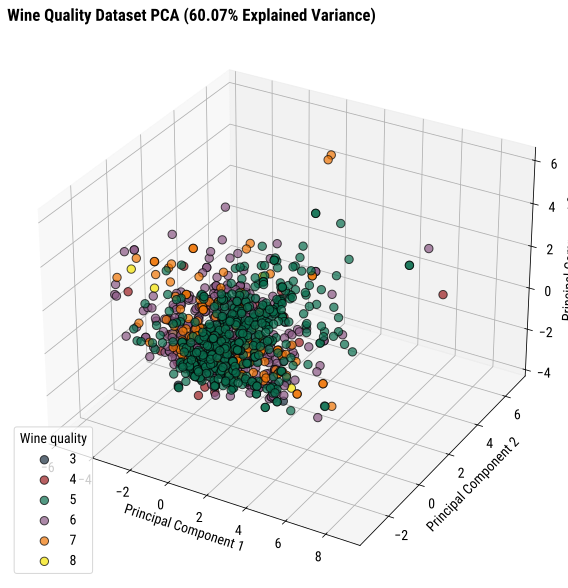

In [56]:
total_explained_variance = sum(pca.explained_variance_ratio_[:3]) * 100
colors = ["#1C3041", "#9B1D20", "#0B6E4F", "#895884", "#F07605", "#F5E400"]

pca_3d_df = pd.DataFrame(pca_res[:, :3], columns=["PC1", "PC2", "PC3"])
pca_3d_df["y"] = data["quality"]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

for i, target in enumerate(sorted(pca_3d_df["y"].unique())):
    subset = pca_3d_df[pca_3d_df["y"] == target]
    ax.scatter(xs=subset["PC1"], ys=subset["PC2"], zs=subset["PC3"], s=70, alpha=0.7, c=colors[i], edgecolors="#000000", label=target)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title(f"Wine Quality Dataset PCA ({total_explained_variance:.2f}% Explained Variance)", loc="left", fontdict={"weight": "bold"})

ax.legend(title="Wine quality", loc="lower left")
plt.show()

## PCA Plot #4: Biplot

**Question**: Can I see how the original variables contribute to and correlate with the principal components?

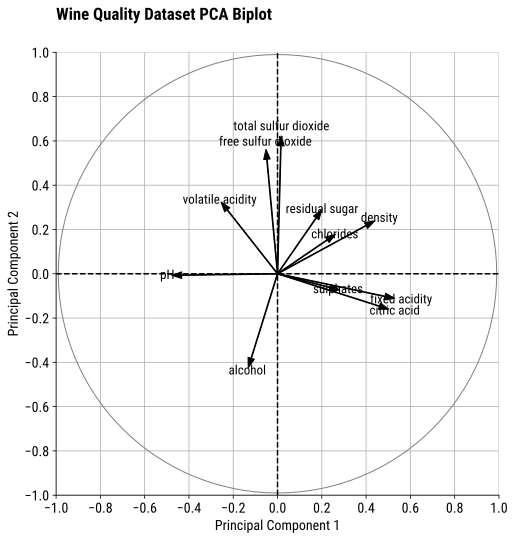

In [57]:
labels = X.columns
n = len(labels)
coeff = np.transpose(pca.components_)
pc1 = pca.components_[:, 0]
pc2 = pca.components_[:, 1]

plt.figure(figsize=(8, 8))

for i in range(n):
    plt.arrow(x=0, y=0, dx=coeff[i, 0], dy=coeff[i, 1], color="#000000", width=0.003, head_width=0.03)
    plt.text(x=coeff[i, 0] * 1.15, y=coeff[i, 1] * 1.15, s=labels[i], size=13, color="#000000", ha="center", va="center")

plt.axis("square")
plt.title(f"Wine Quality Dataset PCA Biplot", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")
circle = plt.Circle((0, 0), 0.99, color="gray", fill=False)
plt.gca().add_artist(circle)

plt.grid()
plt.show()

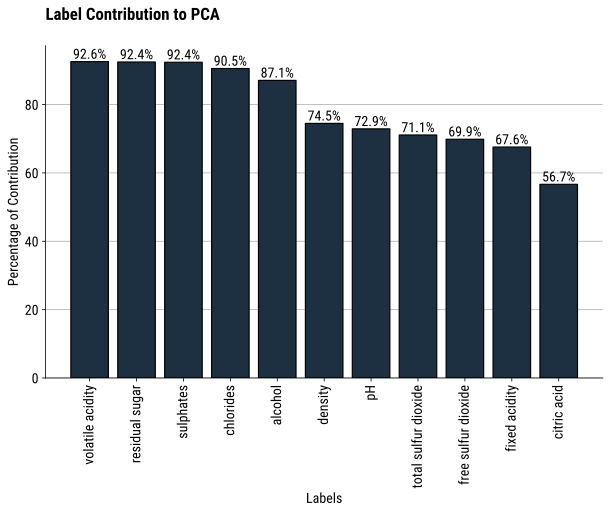

In [58]:
number_of_components = 7

label_importance = np.sqrt(sum(pca.components_[:number_of_components] ** 2))
label_importance = sorted(zip(label_importance, labels), reverse=True)

plot_y = [val[0] * 100 for val in label_importance]
plot_x = [val[1] for val in label_importance]

bars = plt.bar(plot_x, plot_y, align="center", color="#1C3041", edgecolor="#000000", linewidth=1.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f"{yval:.1f}%", ha="center", va="bottom")

plt.xticks(rotation='vertical')
plt.xlabel("Labels")
plt.ylabel("Percentage of Contribution")
plt.title("Label Contribution to PCA", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.grid(axis="y")
plt.xticks(plot_x)

plt.show()

[0.07374142 0.10169726 0.06850708 0.07047112 0.07020233 0.08636576
 0.08823068 0.06434027 0.08069628 0.11047672 0.18527104]


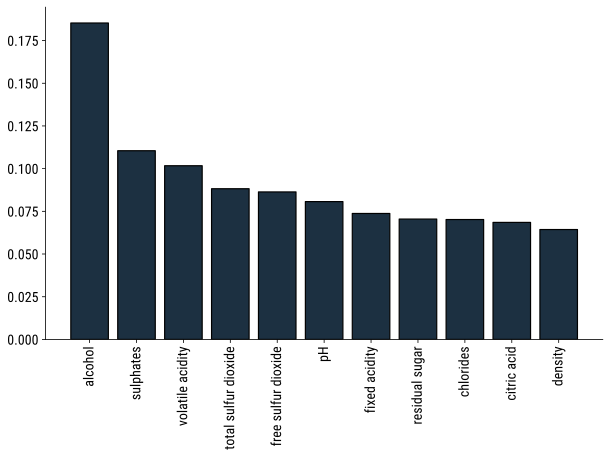

In [59]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

X = data.drop("quality", axis=1)
y = data["quality"] - min(data["quality"])

X_scaled = StandardScaler().fit_transform(X)

# fit model no training data
model = XGBClassifier()
model.fit(X_scaled, y)
# feature importance
print(model.feature_importances_)

features = X.columns
feature_importance = sorted(zip(features, model.feature_importances_), key=lambda x: x[1], reverse=True)

# plot
plt.xticks(rotation='vertical')
pyplot.bar([x for x, _ in feature_importance], [y for _, y in feature_importance], align="center", color="#1C3041", edgecolor="#000000", linewidth=1.2)
pyplot.show()

## PCA Plot #5: Loading Score Plot

**Question**: Which variables from the original dataset have the most influence on each principal component?

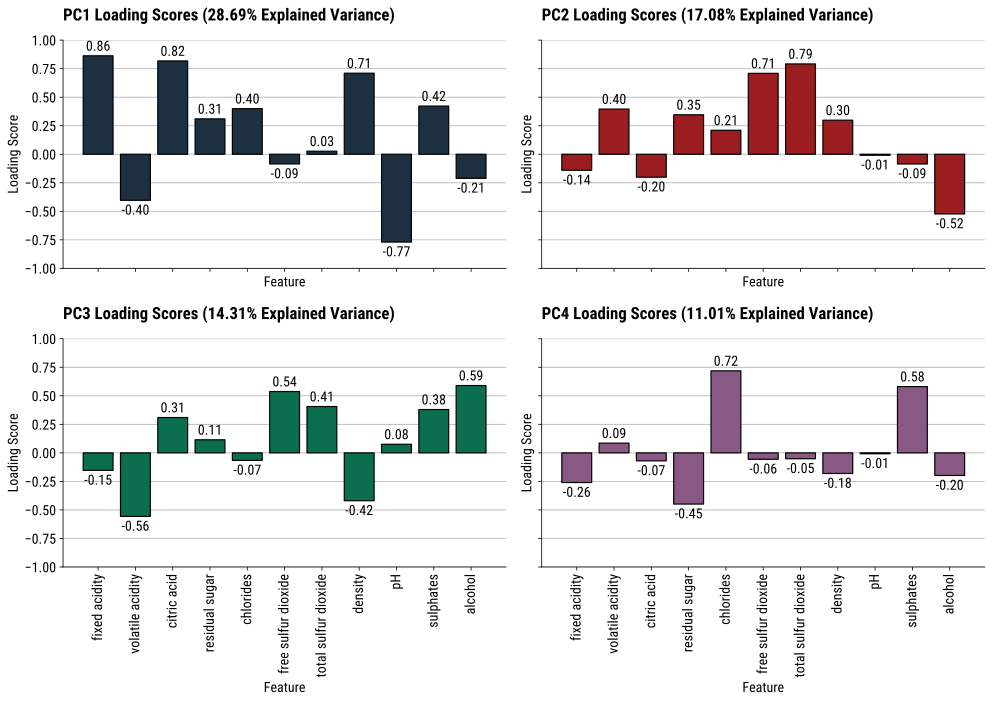

In [60]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f"PC{i}" for i in range(1, len(X.columns) + 1)],
    index=X.columns
)

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
colors = ["#1C3041", "#9B1D20", "#0B6E4F", "#895884"]

for i, ax in enumerate(axs.flatten()):
    explained_variance = pca.explained_variance_ratio_[i] * 100
    pc = f"PC{i+1}"
    bars = ax.bar(loadings.index, loadings[pc], color=colors[i], edgecolor="#000000", linewidth=1.2)
    ax.set_title(f"{pc} Loading Scores ({explained_variance:.2f}% Explained Variance)", loc="left", fontdict={"weight": "bold"}, y=1.06)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Loading Score")
    ax.grid(axis="y")
    ax.tick_params(axis="x", rotation=90)
    ax.set_ylim(-1, 1)
    
    for bar in bars:
        yval = bar.get_height()
        offset = yval + 0.02 if yval > 0 else yval - 0.15
        ax.text(bar.get_x() + bar.get_width() / 2, offset, f"{yval:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()